In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import gc

In [99]:
#Loading the data
data =  pd.read_csv('multipleChoiceResponses.csv')
QQ = data.keys()
questions = data.values[0,:].reshape(-1,1)
#Make the data more manageable wiht proper names to data. Replacement.
#Normally this is gonna be the data fot analysis.
data = data.rename(columns={'Time from Start to Finish (seconds)':'Time',
                            'Q1':'Gender',
                            'Q2':'Age',
                            'Q3':'Country',
                            'Q4':'Degree',
                            'Q5':'Major',
                            'Q6':'Job',
                            'Q7':'Industry',
                            'Q8':'Experience',
                            'Q9':'Salary',
                            'Q12_MULTIPLE_CHOICE':'Software',
                            'Q17':'Language',
                            'Q24':'Data_Experience',
                            'Q25':'ML_Experience',
                            'Q39_Part_1':'MOOCs_Opinion'})
data['Country'] = data['Country'].apply(lambda x: x if x != 'United States of America' else 'USA')  
data['Country'] = data['Country'].apply(lambda x: x if x != 'United Kingdom of Great Britain and Northern Ireland' else 'UK')
data['Country'] = data['Country'].apply(lambda x: x if x != 'Iran, Islamic Republic of...' else 'Iran') 
#print(data['Time'])
data = data.drop([0])

/srv/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


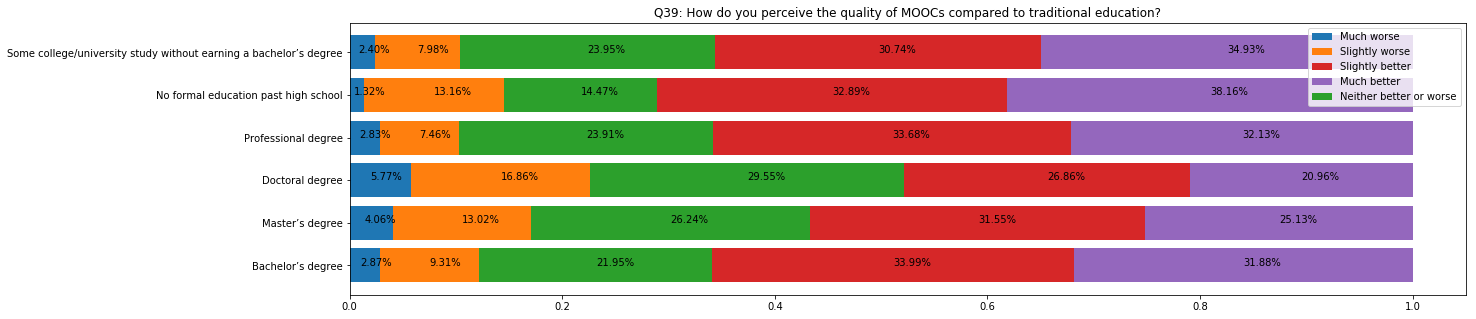

In [8]:
#print(data.Degree.value_counts())
#Data percentage preparation for visualization of answers based on education level
degrees = ['Bachelor’s degree', 
           'Master’s degree', 
           'Doctoral degree', 
           'Professional degree', 
           'No formal education past high school', 
           'Some college/university study without earning a bachelor’s degree']
cc = pd.DataFrame(columns = degrees)
for i in degrees:
    cc[i] = data.loc[data['Degree'] == i, 'MOOCs_Opinion'].value_counts()
cc = cc.drop('No opinion; I do not know')
cc = (cc/cc.sum())
#print(cc)
cc = cc.values
#print(cc)

plt.figure(figsize=(20,5))
N = 6
MW = plt.barh(range(N), cc[4,:])
SW = plt.barh(range(N), cc[3,:], left=cc[4,:])
Non = plt.barh(range(N), cc[2,:], left=(cc[4,:]+cc[3,:]))
SB = plt.barh(range(N), cc[0,:], left=(cc[4,:]+cc[3,:]+cc[2,:]))
MB = plt.barh(range(N), cc[1,:], left=(cc[4,:]+cc[3,:]+cc[2,:]+cc[0,:]))
plt.yticks(range(N), degrees)
plt.title('Q39: How do you perceive the quality of MOOCs compared to traditional education?')
plt.legend((MW[0], SW[0], SB[0], MB[0], Non[0]), ('Much worse', 'Slightly worse', 'Slightly better', 'Much better', 'Neither better or worse'))
for i in range(N):
        plt.text(0+cc[4,i]/3.0,i,"{:.2%}".format(cc[4,i]))
        plt.text(cc[4,i]+cc[3,i]/2.0,i,"{:.2%}".format(cc[3,i]))
        plt.text(cc[4,i]+cc[3,i]+cc[2,i]/2.0,i,"{:.2%}".format(cc[2,i]))
        plt.text(cc[4,i]+cc[3,i]+cc[2,i]+cc[0,i]/2.0,i,"{:.2%}".format(cc[0,i]))
        plt.text(cc[4,i]+cc[3,i]+cc[2,i]+cc[0,i]+cc[1,i]/2.0,i,"{:.2%}".format(cc[1,i]))

We can observe something interesting. The more degree they have, the more reject they have for MOOC's. More degrees (up to Doctoral degree) stands for more teaching hours or experiencie on teaching, whiel the resto tends to recieve teaching.
Here, the experienced people on teaching seems not to support in the same way the MOOC's like the other people, meaning that their experience stands for a statement like "Normal teaching methods or traditional education is better than the MOOC's education". However, we must not get confused. Sometimes this doesn't reflect the general statement already said. Doctoral degrees needs more research hours and dedication. For normal education standards, such as the high school levels or the bachelor levels (completed or not), a MOOC's methodology is quite good since on these levels, the education background is the bacis. However, in PhD's, since the reseach challenges are more focused, Doctoral candidates could like to approach to a more personal supervising learning method such as the director's supervization and corrections, since their reseach are more focused, and thus, a basic topic teaching, which is something that normally MOOC's do, is not the best way to achieve their research objectives.

In [115]:
#Machine Learning with Support Vector Machine
import sklearn.svm as SVM

variables = ['Time',
'Gender',
'Age',
'Country',
'Degree',
'Major',
'Job',
'Industry',
'Experience',
'Salary',
'Software',
'Language',
'Data_Experience',
'ML_Experience']

variables = ['Time',
'Gender',
'Age',
'Degree',
'Experience',
'Salary',
'Data_Experience',
'ML_Experience',
'MOOCs_Opinion']

new_data = data[variables].dropna()

Y = new_data['MOOCs_Opinion']
X = new_data[variables]

nY = Y.values
nX = X.values

print(len(nX),len(nY))

14656 14656


In [117]:
#Make data numeric
print(Y.value_counts())

for i in range(len(X)):
    #ML_EXperiencie
    if(nX[i,-1] ==  '< 1 year'):
        nX[i,-1] = 0.5
    if(nX[i,-1] ==  '1-2 years'):
        nX[i,-1] = 1.5
    if(nX[i,-1] ==  '2-3 years'):
        nX[i,-1] = 2.5
    if(nX[i,-1] ==  '3-4 years'):
        nX[i,-1] = 3.5
    if(nX[i,-1] ==  '4-5 years'):
        nX[i,-1] = 4.5
    if(nX[i,-1] ==  '5-10 years'):
        nX[i,-1] = 7.5
    if(nX[i,-1] ==  '10-15 years'):
        nX[i,-1] = 12.5
    if(nX[i,-1] ==  '20+ years'):
        nX[i,-1] = 20.0
    if(nX[i,-1] ==  'I have never studied machine learning but plan to learn in the future' or nX[i,-1] ==  'I have never studied machine learning and I do not plan to'):
        nX[i,-1] = 0.0
        
    #Data_Experience
    if(nX[i,-2] ==  '< 1 year'):
        nX[i,-2] = 0.5
    if(nX[i,-2] ==  '1-2 years'):
        nX[i,-2] = 1.5
    if(nX[i,-2] ==  '3-5 years'):
        nX[i,-2] = 4.0
    if(nX[i,-2] ==  '5-10 years'):
        nX[i,-2] = 7.5
    if(nX[i,-2] ==  '10-20 years'):
        nX[i,-2] = 15.0
    if(nX[i,-2] ==  '20-30 years'):
        nX[i,-2] = 25.0
    if(nX[i,-2] ==  '30-40 years'):
        nX[i,-2] = 35.0
    if(nX[i,-2] ==  '40+ years'):
        nX[i,-2] = 40.0
    if(nX[i,-2] ==  'I have never written code but I want to learn' or nX[i,-2] ==  'I have never written code and I do not want to learn'):
        nX[i,-2] = 0.0
        
    #Salary
    if(nX[i,-3] ==  '0-10,000'):
        nX[i,-3] = 5000.0
    if(nX[i,-3] ==  '10-20,000'):
        nX[i,-3] = 15000.0
    if(nX[i,-3] ==  '20-30,000'):
        nX[i,-3] = 25000.0
    if(nX[i,-3] ==  '30-40,000'):
        nX[i,-3] = 35000.0
    if(nX[i,-3] ==  '40-50,000'):
        nX[i,-3] = 45000.0
    if(nX[i,-3] ==  '50-60,000'):
        nX[i,-3] = 55000.0
    if(nX[i,-3] ==  '100-125,000'):
        nX[i,-3] = 112500.0
    if(nX[i,-3] ==  '60-70,000'):
        nX[i,-3] = 65000.0
    if(nX[i,-3] ==  '70-80,000'):
        nX[i,-3] = 75000.0
    if(nX[i,-3] ==  '80-90,000'):
        nX[i,-3] = 85000.0
    if(nX[i,-3] ==  '90-100,000'):
        nX[i,-3] = 95000.0
    if(nX[i,-3] ==  '125-150,000'):
        nX[i,-3] = 85000.0
    if(nX[i,-3] ==  '150-200,000'):
        nX[i,-3] = 85000.0
    if(nX[i,-3] ==  '125-150,000'):
        nX[i,-3] = 175000.0
    if(nX[i,-3] ==  '200-250,000'):
        nX[i,-3] = 225000.0
    if(nX[i,-3] ==  '250-300,000'):
        nX[i,-3] = 275000.0
    if(nX[i,-3] ==  '300-400,000'):
        nX[i,-3] = 350000.0
    if(nX[i,-3] ==  '400-500,000'):
        nX[i,-3] = 450000.0
    if(nX[i,-3] ==  '500,000+'):
        nX[i,-3] = 500000.0
    if(nX[i,-3] ==  'I do not wish to disclose my approximate yearly compensation'):
        nX[i,-3] = 50000.0
        
    #Experience
    if(nX[i,-4] ==  '0-1'):
        nX[i,-4] = 0.5
    if(nX[i,-4] ==  '1-2'):
        nX[i,-4] = 1.5
    if(nX[i,-4] ==  '5-10'):
        nX[i,-4] = 7.5
    if(nX[i,-4] ==  '2-3'):
        nX[i,-4] = 2.5
    if(nX[i,-4] ==  '3-4'):
        nX[i,-4] = 3.5
    if(nX[i,-4] ==  '10-15'):
        nX[i,-4] = 12.5
    if(nX[i,-4] ==  '4-5'):
        nX[i,-4] = 4.5
    if(nX[i,-4] ==  '15-20'):
        nX[i,-4] = 17.5
    if(nX[i,-4] ==  '20-25'):
        nX[i,-4] = 22.5 
    if(nX[i,-4] ==  '30 +'):
        nX[i,-4] = 30.0
    if(nX[i,-4] ==  '25-30'):
        nX[i,-4] = 27.5
        
    #Degree
    if(nX[i,-5] ==  'I prefer not to answer'):
        nX[i,-5] = -1.0
    if(nX[i,-5] ==  'No formal education past high school'):
        nX[i,-5] = 0.0
    if(nX[i,-5] ==  'Professional degree'):
        nX[i,-5] = 1.0
    if(nX[i,-5] ==  'Some college/university study without earning a bachelor’s degree'):
        nX[i,-5] = 2.0
    if(nX[i,-5] ==  'Bachelor’s degree'):
        nX[i,-5] = 3.0
    if(nX[i,-5] ==  'Master’s degree'):
        nX[i,-5] = 4.0
    if(nX[i,-5] ==  'Doctoral degree'):
        nX[i,-5] = 5.0
        
    #Age
    if(nX[i,-6] ==  '25-29'):
        nX[i,-6] = 27.0
    if(nX[i,-6] ==  '22-24'):
        nX[i,-6] = 23.0
    if(nX[i,-6] ==  '30-34'):
        nX[i,-6] = 32.0
    if(nX[i,-6] ==  '35-39'):
        nX[i,-6] = 37.0
    if(nX[i,-6] ==  '18-21'):
        nX[i,-6] = 19.5
    if(nX[i,-6] ==  '40-44'):
        nX[i,-6] = 42.0
    if(nX[i,-6] ==  '4-5'):
        nX[i,-6] = 4.5
    if(nX[i,-6] ==  '45-49'):
        nX[i,-6] = 47.0
    if(nX[i,-6] ==  '50-54'):
        nX[i,-6] = 52.0 
    if(nX[i,-6] ==  '55-59'):
        nX[i,-6] = 57.0
    if(nX[i,-6] ==  '60-69'):
        nX[i,-6] = 64.5
    if(nX[i,-6] ==  '70-79'):
        nX[i,-6] = 74.5
    if(nX[i,-6] ==  '80+'):
        nX[i,-6] = 80.0
        
    #Gender
    if(nX[i,-7] ==  'Male'):
        nX[i,-7] = 1.0
    if(nX[i,-7] ==  'Female'):
        nX[i,-7] = -1.0
    if(nX[i,-7] ==  'Prefer not to say' or nX[i,-7] ==  'Prefer to self-describe'):
        nX[i,-7] = 0.0
        
    #MOOCs_Opinion
    if(nX[i,-7] ==  'Male'):
        nX[i,-7] = 1.0
    if(nX[i,-7] ==  'Female'):
        nX[i,-7] = -1.0
    if(nX[i,-7] ==  'Prefer not to say' or nX[i,-7] ==  'Prefer to self-describe'):
        nX[i,-7] = 0.0


print(len(nX),len(nY))
clf = SVM.SVC(kernel='rbf')
clf.fit(nX,nY)
print(nX[:,-2])

Slightly better              4176
Much better                  3513
Neither better nor worse     3384
Slightly worse               1629
No opinion; I do not know    1429
Much worse                    525
Name: MOOCs_Opinion, dtype: int64
14656 14656


ValueError: could not convert string to float: 'No opinion; I do not know'